# Classification model using Random Forest

### 1. Import libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

### 2. Upload RNA data

In [32]:
path ='../../../../Data_preprocessing/Prediction PFS/RNA+Clinic joined/New/Clinical_data_and_RNA_98_Features_PFS.csv'
data = pd.read_csv(path)
data.head(5)

,Unnamed: 0,RNA_ID,Age,Sarc,Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,PFS,TM_TC_Ratio,...,SYT10,TARBP2,TAS1R3,TAT,TRAV41,TRIM43B,VN2R17P,XPC,ZNF608,ZNF746
0,0,G138701_RCCBMS-00020-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,962.0,-16.406250,12.164384,0.766909,...,21.82797,29.60417,26.87053,22.27506,22.22154,21.9744,21.12857,32.24472,34.46991,29.11848
1,1,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,67.0,0.0,0.0,2.0,254.0,-40.000000,5.490411,0.773269,...,23.53072,29.61188,26.87283,22.27506,22.22154,21.9744,21.12857,32.15619,34.95662,30.78421
2,2,G138701_RCCBMS-00141-T_v1_RNA_OnPrem,62.0,0.0,0.0,1.0,800.0,-89.436620,61.906849,1.782859,...,21.82797,31.90343,23.88665,27.71190,22.22154,21.9744,21.12857,31.86536,32.73029,31.98340
3,3,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,60.0,0.0,0.0,3.0,790.0,11.787072,1.249315,5.890573,...,31.50567,30.35424,25.66465,22.27506,22.22154,21.9744,21.12857,31.63561,33.92535,30.68180
4,4,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,76.0,0.0,0.0,2.0,1241.0,0.000000,5.654795,1.374775,...,27.75696,31.60946,27.41015,22.27506,22.22154,21.9744,21.12857,33.12717,33.16473,30.01943


In [33]:
X = data.iloc[:,27:125]
Y=[]
# For each entry I classified it by its PFS value.
for i in range (len(data)):
    if data.PFS[i]<3: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    elif data.PFS[i]<6:
        Y.append(1)# If PFS is over 3 months, I will consider it as Responder (R)
    else:
        Y.append(2)
print(X)
print('Numero de pacientes: ',len(Y))

         ABHD5  AC005307.1  AC005550.3  AC090957.2      AGAP3  AP001055.6  \
0    30.497897   21.055379   21.270652   21.030369  32.969805   22.028180   
1    31.269076   21.055379   21.270652   21.030369  32.303016   22.028180   
2    32.103159   21.055379   21.270652   21.030369  31.523937   22.028180   
3    31.860291   21.055379   21.270652   21.030369  32.234884   22.028180   
4    31.130802   21.055379   21.270652   21.030369  33.158813   22.028180   
..         ...         ...         ...         ...        ...         ...   
176  32.097191   20.944668   20.782537   20.962109  33.553554   20.515641   
177  33.549605   20.944668   20.782537   20.962109  32.424865   24.317471   
178  32.023461   20.944668   22.065655   20.962109  33.420634   20.515641   
179  30.836938   20.944668   21.846195   20.962109  33.432114   23.692971   
180  31.554782   20.944668   23.384450   20.962109  33.223246   20.515641   

     AP003025.2     AQP7P4   ATP5G2P1       AVIL  ...     SYT10    TARBP2  

### 3. Train-Test dataset split

In [34]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125, stratify=Y)

# Convert sets to arrays
XTrain = XTrain.values
XTest = XTest.values

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


### 4. Select the parameters of the model and fit it

In [35]:
param_grid = {'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9],
              'random_state':[125],
              'n_estimators': [3, 4, 5, 10, 15, 20],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
              'max_depth':[None, 2, 3, 4, 5, 6, 7, 8, 9, 10,50]
              }

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(
        estimator  = RandomForestClassifier(),
        param_grid = param_grid,
        cv=5
       )

clf.fit(XTrain , yTrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [3, 4, 5, 10, 15, 20],
                         'random_state': [125]})

In [36]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
# Fit the model with the best parameters
model.fit(XTrain , yTrain)

Best estimate of parameters according to GridSearchCV:


RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=8,
                       n_estimators=5, random_state=125)

In [37]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.5773399014778325


### 5. Prediction

In [38]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [39]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1


### 6. Results

In [40]:
print('Final accuracy on the training dataset:' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(yTest)))

Final accuracy on the training dataset:0.75
Final accuracy on the testing dataset: 0.43243243243243246


In [41]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[57  0 10]
 [ 8  8  9]
 [ 9  0 43]]
Input data:  [1 0 2 0 2 2 0 0 2 0 2 0 1 0 2 2 0 2 2 2 0 0 0 2 0 0 0 0 1 1 2 2 2 2 0 1 2
 0 0 2 1 2 2 1 0 0 2 2 1 0 0 0 2 0 0 2 0 2 1 2 0 2 1 0 0 0 0 2 2 2 0 2 0 0
 0 2 0 2 0 0 0 1 2 0 0 1 2 2 1 1 0 2 0 2 0 0 1 0 1 0 0 2 0 0 2 2 2 1 0 2 2
 1 2 0 1 0 0 0 2 0 1 0 2 0 0 2 1 1 0 0 0 2 0 1 0 0 0 2 2 2 1 2 0 1]
Prediction:        [2 0 2 0 0 2 0 0 0 0 0 0 2 0 2 2 0 2 2 2 2 0 0 2 0 0 0 0 2 2 2 2 2 2 0 0 2
 2 0 2 0 2 2 1 0 0 2 2 1 0 0 0 0 0 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 2 0 2 0 2
 0 2 0 2 0 0 2 0 2 0 0 2 2 0 2 1 0 2 2 2 2 0 2 0 1 0 2 2 0 0 2 2 2 1 0 2 0
 1 0 0 2 0 0 0 2 0 1 0 2 0 0 2 1 0 0 0 0 2 2 0 0 0 0 2 2 2 2 0 2 0]


In [42]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        67
           1       1.00      0.32      0.48        25
           2       0.69      0.83      0.75        52

    accuracy                           0.75       144
   macro avg       0.82      0.67      0.68       144
weighted avg       0.78      0.75      0.73       144



In [43]:
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix(yTest,yhatTest))
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[13  0  5]
 [ 4  0  2]
 [ 9  1  3]]
Input data:  [0 1 0 2 0 2 1 0 1 0 2 2 1 2 2 0 1 2 0 0 0 2 1 0 0 2 0 2 2 0 0 0 2 2 0 0 0]
Prediction:        [0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2 2 0 0 0 1 0 2 0 0 2 0 2 2 2 0 0 0 2 0 0]


In [44]:
print(classification_report(yTest,yhatTest))

              precision    recall  f1-score   support

           0       0.50      0.72      0.59        18
           1       0.00      0.00      0.00         6
           2       0.30      0.23      0.26        13

    accuracy                           0.43        37
   macro avg       0.27      0.32      0.28        37
weighted avg       0.35      0.43      0.38        37



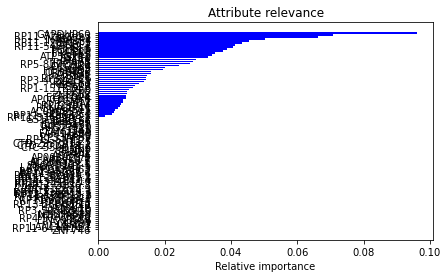

ABHD5 = 0.015897624553289892
AC005307.1 = 0.0
AC005550.3 = 0.0
AC090957.2 = 0.005151770429879082
AGAP3 = 0.011116293696332439
AP001055.6 = 0.008282906089074196
AP003025.2 = 0.0
AQP7P4 = 0.0
ATP5G2P1 = 0.03425111734956117
AVIL = 0.0
CFL1P1 = 0.0
CLDN8 = 0.0
CTC-550B14.6 = 0.0
CTD-2012J19.2 = 0.0
CTD-2337A12.1 = 0.0
DLGAP4 = 0.024342115281178738
EEF1DP4 = 0.008384475771768155
EIF4A1P9 = 0.0
FAM172BP = 0.0
FAM224A = 0.0
GAPDHP60 = 0.09613082278980875
GJA3 = 0.0
GJA9 = 0.019999547965789823
GLIS3-AS1 = 0.0
GPR155 = 0.0
GS1-388B5.2 = 0.0
GYPE = 0.01456674525029116
HERPUD2 = 0.019642481756208897
HKR1 = 0.0
HSF1 = 0.04063381905702413
IL25 = 0.0
KLHL10 = 0.012156757470093819
KLHL5 = 0.03522606876762373
LA16c-17H1.3 = 0.0
LANCL1-AS1 = 0.0
LEMD1 = 0.0
LGSN = 0.0
LINC00656 = 0.0
LPAR1 = 0.029519465639509385
MTCO3P40 = 0.0
NDUFA5P8 = 0.0
NEIL3 = 0.0
NPAP1P4 = 0.05040584432435981
NPIPB15 = 0.005852913115893986
OR13K1P = 0.0
OR2J4P = 0.0
OR5BK1P = 0.016010413803140316
PCMT1 = 0.007600944357303405
PCP

In [45]:
# Through the created model we can see which attributes are the most significant to make a decision.
# The most relevant attributes will be the ones placed at the top of the tree.
features = list(X)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Attribute relevance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

for name, importance in zip(X, model.feature_importances_):
    print(name, "=", importance)

# Attributes whose relevance is 0, will not be necessary to make the prediction of the target.